# Getting into cluster analysis

## What is cluster analysis


Clustering or cluster analysis is an aspect of statistical data analysis where you segment the datasets into groups based on similarities. Here, the data points that are close to one another are grouped together to form clusters. Clustering is one of the core data mining techniques and comes under the umbrella of unsupervised Machine Learning. Clustering, being an unsupervised learning technique, does not require much human intervention and any pre-existing labels. This technique is generally used for exploratory data analysis.

Let's understand the use of cluster analysis with an example. Suppose the mayor of Kathmandu wants to plan an efficient allocation of the budget for road safety, but is unsure about which areas to focus on. Here, cluster analysis can be used to identify areas where incidents of road accidents are clustered within the city. This analysis can reveal that different clusters have specific causes of accidents, such as high speed, lack of road signs, unmaintained roads, and unorganized pedestrian crossings. By understanding these factors, the mayor can allocate the budget accordingly, prioritizing road repairs, traffic lights, signage, speed cameras, public awareness programs, and traffic personnel deployment. This data-driven approach can significantly reduce the number of accidents. Clustering can be a great way to find patterns and relationships within a large data set. There are various uses of clustering in various industries. Some common application of clustering are : 



- Customer segmenting for targeted marketing
- Recommendation system to suggest songs, movies, contents to users with similar preferences
- Detecting anomalities for fraud detection, predictive maintenance and network security
- Image segmentation for tumor detection through medical imaging, land cover classification and computer vision for self driving cars
- Spatial data analysis for city planning, disease survellience, crime analysis, etc.


While there are numerous clustering techniques, the K-means clustering is used most widely. There is no best clustering technique and the most favorable technique is determined by the properties of data and the purpose of analysis. As of now there are more than 100 different types of algorithms used in clustering. However, the clustering techniques most commonly used can be divided in following categories: 

- Partitional clustering : K-means, K-medoids, Fuzzy C-means
- Hieriarchial clustering : Agglomerative (Bottom-up approach), Divisive (Top-down approach)
- Density-Based clustering : DBSCAN, OPTICS, DENCLUE
- Grid-Based clustering : STING, WaveCluster
- Model-Based clustering : EM, COBWEB, SOM

# Customer segmentation using Clustering in Python

#### Dataset used - https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

In this project, we will be conducting Agglomerative and K-means clustering on customer demographic data to segment customers for targeted marketing. Major steps we will take in the project are : 

1. Feature engineering and data cleaning
2. Scaling the data
3. Reducing the dimensionality using PCA
4. Using Elbow method to determine optimal no of clusters
5. Clustering using Agglomerative and K-means clustering
6. Checking the quality of the results using Silhoutte score
7. Checking the results of clustering
8. Interpreting the results of clustering


The dataset we will be working has following attributes: 


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

# Importing the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Exploring the data

In [5]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.shape

(2240, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Here, we can see the income variable has few rows with missing values which we will be dropping as it is only a minor part of the whole dataset

In [9]:
df = df.dropna()

In [10]:
df.shape

(2216, 29)

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Feature Engineering and data cleaning

Here we will be conducting basic feature engineering to calculate new features using existing variables. Features added are as follows:

- Calculating Age from the Birth year column
- Add total amount spent column by adding all the subcategories of amount spent
- Get the total count of campains accepted by adding the count of all campaigns

In [12]:
#Calculating Age from the birth year

df['Age'] = 2024 - df["Year_Birth"]

# Get sum of all the spending columns for each customer 

col_names = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

df['Totalspent'] = df[col_names].sum(axis=1)

# Get sum of all the accepted campaign columns for each customer 

col_names2 = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']

df['Cmp_accepted'] = df[col_names2].sum(axis=1)



In [13]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Totalspent,Cmp_accepted
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,55.179603,607.075361,0.298285
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,602.900476,0.679209
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000,5.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000,69.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000,396.500000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000,1048.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000,2525.000000,4.000000


We can see that the max value for age is 131. The data is definitely old and outdated. Hence, we will be dropping instances where age is greater than 90.

In [14]:
df = df[(df["Age"]<90)]

# Checking for outliers

Since K-Means Clustering is sensitive to outliers, we are checking if there are any outliers using boxplot

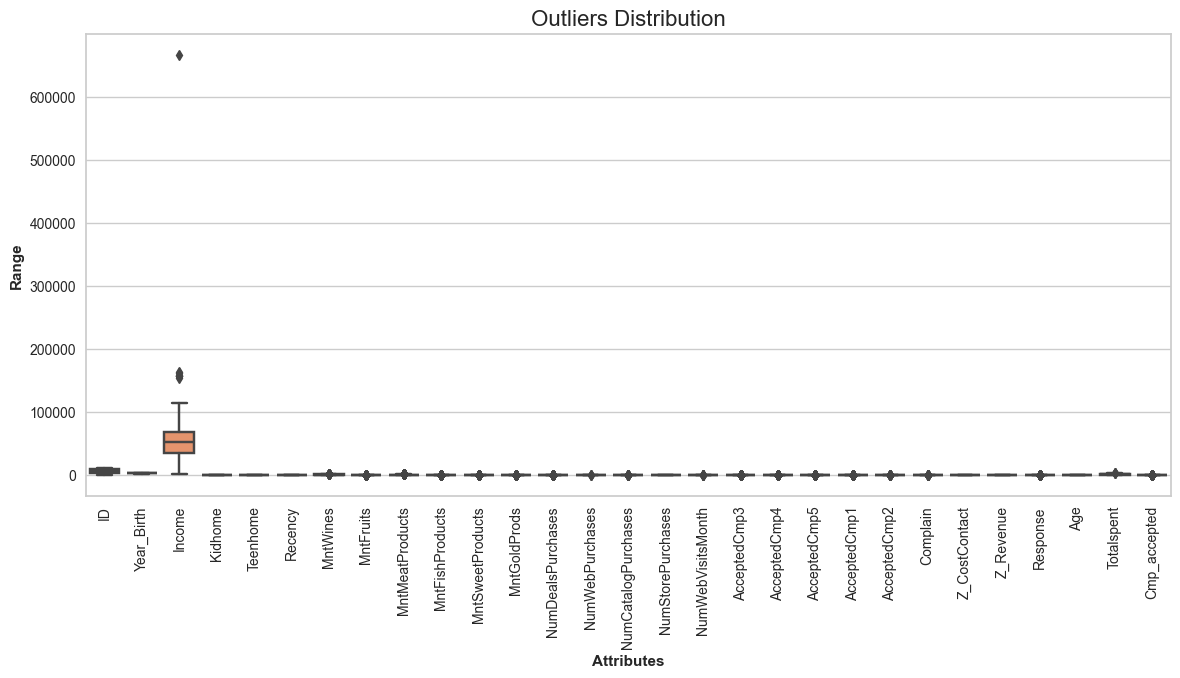

In [15]:
# Plot the processed dataset
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    plt.xticks(rotation=90)
   
show_boxplot(df)

Here we can see that the income column has a huge outlier hence we will be dropping the instances with income values above 600000

In [16]:
# Dropping instances where income is greater than 600000 
df = df[(df["Income"]<600000)]
print("Total remaining values after removing outliers =", len(df))

Total remaining values after removing outliers = 2212


# Preprocessing

First we will be dropping variables with non numerical and irrevelant values.

In [17]:
df_main = df.drop(['ID', 'Year_Birth', 'Education', 'Dt_Customer', 'Marital_Status', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','Complain', 'Response',
       'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue'], axis=1)
df_main

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Totalspent,Cmp_accepted
0,58138.0,0,0,58,3,8,10,4,7,67,1617,0
1,46344.0,1,1,38,2,1,1,2,5,70,27,0
2,71613.0,0,0,26,1,8,2,10,4,59,776,0
3,26646.0,1,0,26,2,2,0,4,6,40,53,0
4,58293.0,1,0,94,5,5,3,6,5,43,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,2,9,3,4,5,57,1341,0
2236,64014.0,2,1,56,7,8,2,5,7,78,444,1
2237,56981.0,0,0,91,1,2,3,13,6,43,1241,1
2238,69245.0,0,1,8,2,6,5,10,3,68,843,0


# Scaling the data to standardize all variables

In [18]:
# Create scaled DataFrame
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_main)
df_scaled.shape

(2212, 12)

# Checking for Correlation

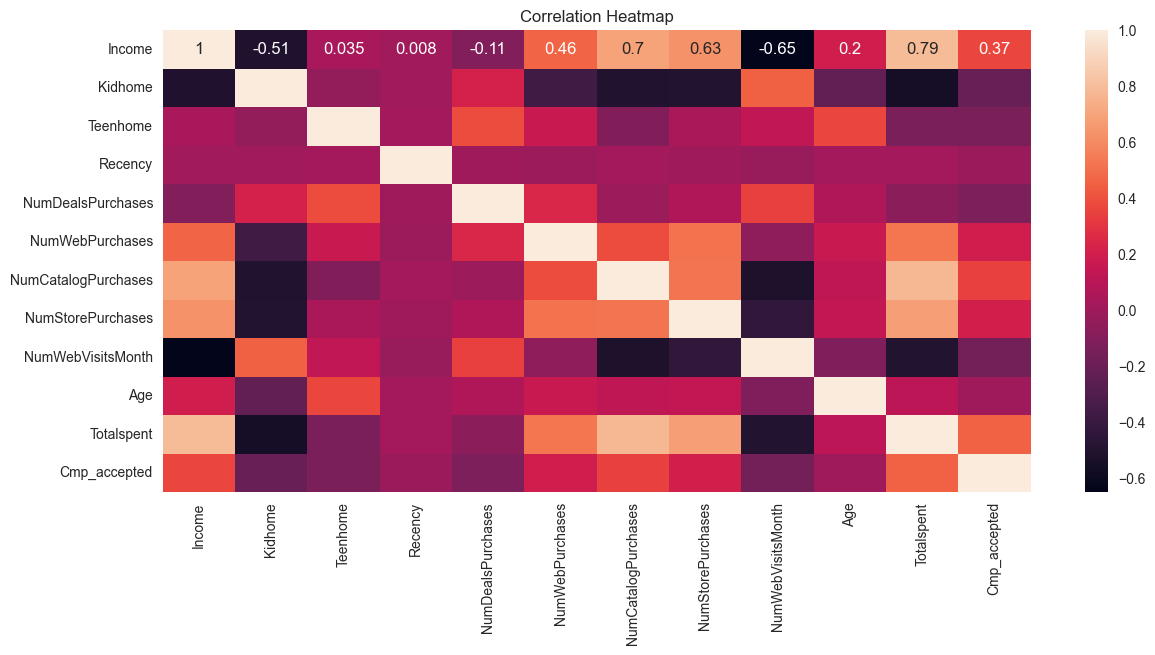

In [19]:
# Plotting heatmap to find correlation
sns.heatmap(df_main.corr(), annot=True)

# Add a title to the plot
plt.title("Correlation Heatmap")  
plt.show()

# Reducing the dimensionality using PCA


While conducting cluster analysis, variables that are correlated can significantly distort the clustering by giving more weight to certain correlated variables and give biased results. Also, high number of dimensions during clustering can cause other issues such as:

- High computational requirement
- High dimentional data (Curse of dimensionality)
- overfitting due to lot of noise in the data
- Performance degradation

PCA lowers the dimensions of the dataset by combining multiple variables while preserving majority of the variance in the data. This helps in boosting the performance of the algorithm, reduce overfitting and make it easier to visualize and interpret the data. Therefore It is necessary to use Dimensionality Reduction Technique such as PCA (Principal Component Analysis), especially while dealing with high-dimensional data. 

In [20]:
#Initiating PCA to reduce dimentions to 3
pca = PCA(n_components=3)

# Fitting the PCA Model:
pca.fit(df_scaled)

# Transforming the Data and Creating a DataFrame:
PCA_df = pd.DataFrame(pca.transform(df_scaled), columns=(["Col1","Col2", "Col3"]))

# Descriptive statistics
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Col1,2212.0,3.533440e-17,2.111655,-5.343992,-1.992934,-0.276420,1.815947,5.928816
Col2,2212.0,-3.854662e-17,1.344805,-3.022773,-1.100264,-0.123943,0.974848,5.203431
Col3,2212.0,5.902452e-17,1.081994,-3.542630,-0.748569,-0.010288,0.681724,4.771927


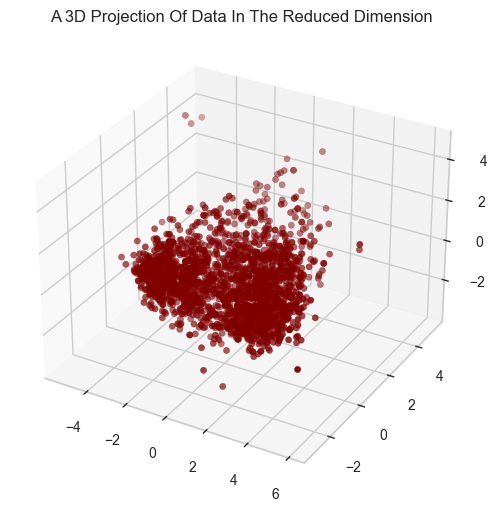

In [21]:
# Plotting the results

#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["Col1"]
y =PCA_df["Col2"]
z =PCA_df["Col3"]
#To plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


# Calculating optimal number of clusters using elbow method

Elbow method is a widely recognized way to determine ideal no of clusters. It uses within-cluster sum of squares (WCSS) or inertia. While calculating WCSS, following steps are carried out:

- Adding the distance between each datapoints and their cluster centroids (mean of the cluster) in a cluster
- Squaring the calculated sum of distances for each clusters
- Adding the square of distances from all clusters

In Elbow method, multiple no of clusters (Usually from 0 to 10 clusters) are created and WCSS is calculated in each cluster. As the no of cluster increases, the WCSS value starts to decline. This decline occurs because as the no of cluster increases the datapoints gets closer to the cluster centroids too and if the no of clusters are continuously increased, it will reach to a point where each data point acts as a single cluster and the value of WCSS becomes 0 as each data point acts as its own centroid. Here, the elbow point or the optimal no of clusters is at the point where adding futher clusters won't reduce WCSS significantly.

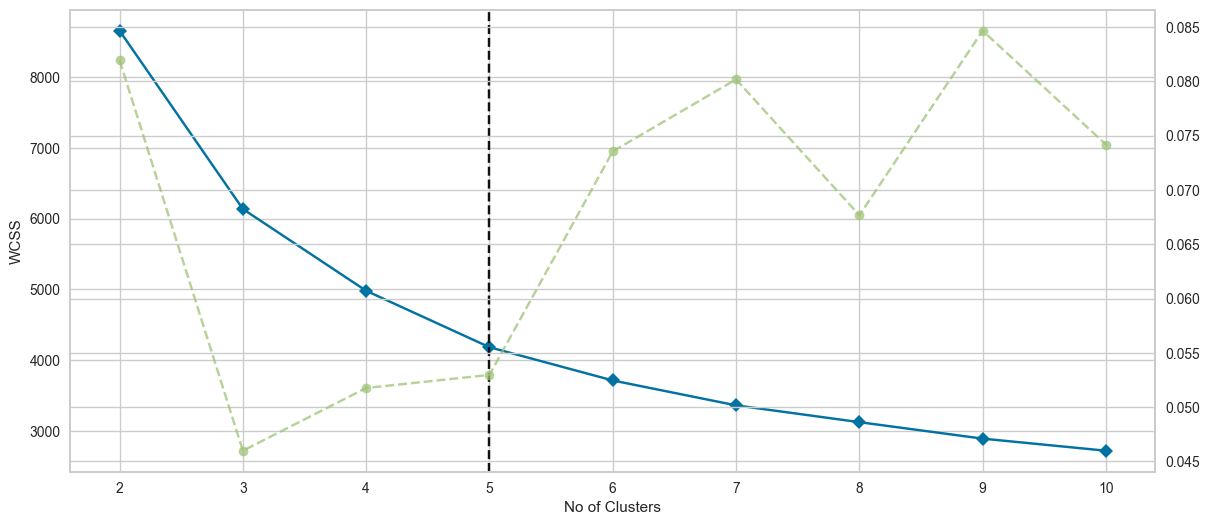

In [22]:
# finding number of clusters using elbow method
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)

Elbow_M.ax.set_xlabel('No of Clusters')
Elbow_M.ax.set_ylabel('WCSS')
plt.show()

We can deduce from the figure that the optimal k is at 5 with elbow method. Hence, we will use 5 clusters as our optimal cluster value.

# First Method :  Agglomerative Clustering

First, we will be using agglomerative clustering, which is a type of hieriarchial clustering. Here, the clusters will be progressively merged upwards to form a larger cluster until all the clusters are merged into one. In agglomerative clustering the optimal number of clusters is obtained by cutting the dendogram at the level which matches our desired no of clusters. We will also plot a dendogram to see how the clusters are formed step by step upwards and how it is cut off at the desired no of clusters. 

0    1038
1     813
2     248
4     110
3       3
Name: count, dtype: int64


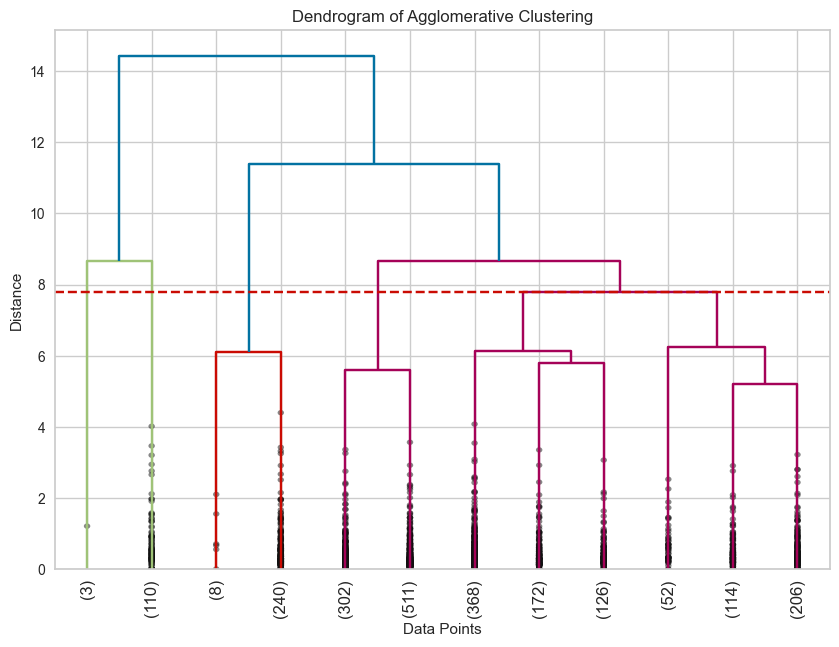

In [23]:
# Using 5 as the optimal cluster value
optimal_k = 5

# Perform hierarchical/agglomerative clustering
ac = AgglomerativeClustering(n_clusters=optimal_k,linkage='complete')
agg_prediction = ac.fit_predict(PCA_df)

# Print the clusters and their count
cluster_counts = pd.Series(agg_prediction).value_counts()
print(cluster_counts)

# Compute the linkage matrix using the complete linkage method
Linkage_matrix = sch.linkage(PCA_df, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Linkage_matrix, truncate_mode='lastp', p=12, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram of Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Add a horizontal line to show the cut for the desired number of clusters
plt.axhline(y=Linkage_matrix[-optimal_k, 2], color='r', linestyle='--')

plt.show()

In the above dendrogram we can see the visual representation of all the clusters and how they are merging upwards in different hieriarchial levels. We can also find a horizontal dotted line indicating where the clusters needs to be cut to get our optimal no of clusters which is 5.

# Second Method : K-means Clustering

K-means is a type of Partitional clustering technique. It works by partitioning a dataset into a fixed no of clusters also referred as K. First it selects one cluster centroid for each cluster at random, then it iteratively forms a cluster by assigning each datapoints to its nearest cluster centroid, calculates the mean of the cluster and assigns it as the new cluster centroids and repeats the process until the centroids do not change significantly.

In [24]:
# Using 5 as the optimal cluster value
optimal_k = 5

# Performing the final clustering with the chosen optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=100, random_state=42)
kmeans_predictions = kmeans.fit_predict(PCA_df)

# Checking the quality of clustering using Silhoutte score

Silhoutte score is a widely used metric to check the quality of clustering. Silhoutte score closer to 1 is considered a good cluster and means that the data points are unlikely to be assigned to another cluster while score closer to -1 means the data point is most likely assigned to wrong clusters. Having score around 0 means that the clustering is weak and data points could be as close to another cluster as they are to their own cluster.

In [25]:
# Calculate the Silhouette score for agglomerative clustering
agg= silhouette_score(PCA_df, agg_prediction)

# Calculate the Silhouette score for kmeans clustering
kmeans = silhouette_score(PCA_df, kmeans_predictions)

print(f"Silhouette Score for Agglomerative clustering: {agg}")
print(f"Silhouette Score for K-means clustering: {kmeans}")

Silhouette Score for Agglomerative clustering: 0.24922619020484865
Silhouette Score for K-means clustering: 0.3569952080522956


We can see that the silhouette score for k-means clustering is higher than that of agglomerative clustering. Hence, we will be moving forward with Kmeans clustering.

# Moving forward with K-means clustering

In [26]:
# Adding the cluster values to original dataframes
df['cluster'] = kmeans_predictions
df_main['cluster'] = kmeans_predictions
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Totalspent,Cmp_accepted,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,67,1617,0,2
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,70,27,0,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,59,776,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,40,53,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,43,422,0,0


# Visualizing the results

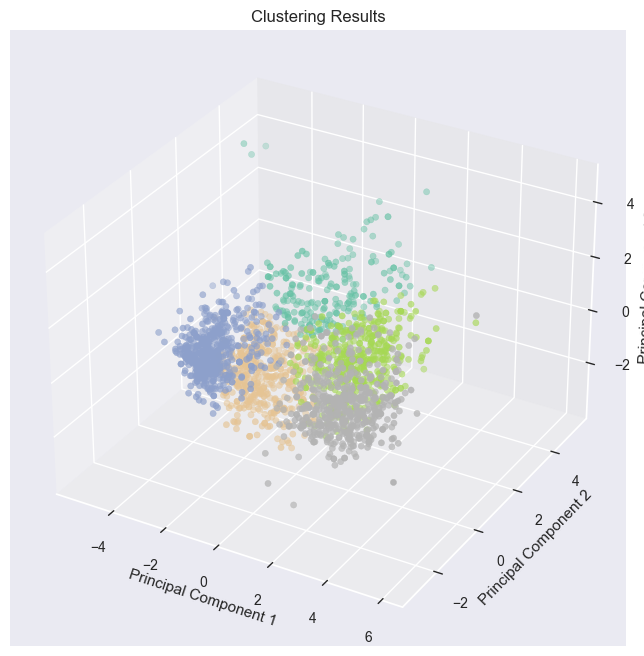

In [46]:
# Visualizing the clustering results

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA_df.iloc[:, 0], PCA_df.iloc[:, 1], PCA_df.iloc[:, 2], c=df['cluster'], cmap='Set2')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.title("Clustering Results")

plt.show()



# Plotting the count of customers in each Clusters

1    558
4    497
3    476
2    467
0    214
Name: count, dtype: int64


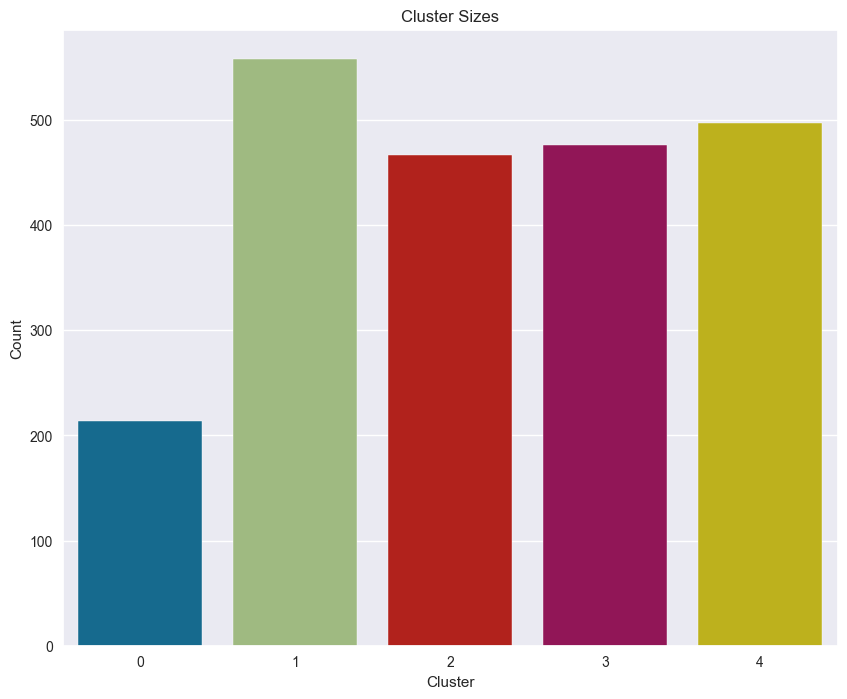

In [47]:
# Calculating total cluster counts
cluster_counts = pd.Series(kmeans_predictions).value_counts()
print(cluster_counts)

# Bar chart of cluster sizes
plt.figure(figsize=(10, 8))
sns.countplot(x="cluster", data=df)
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Income and Total spent by customers

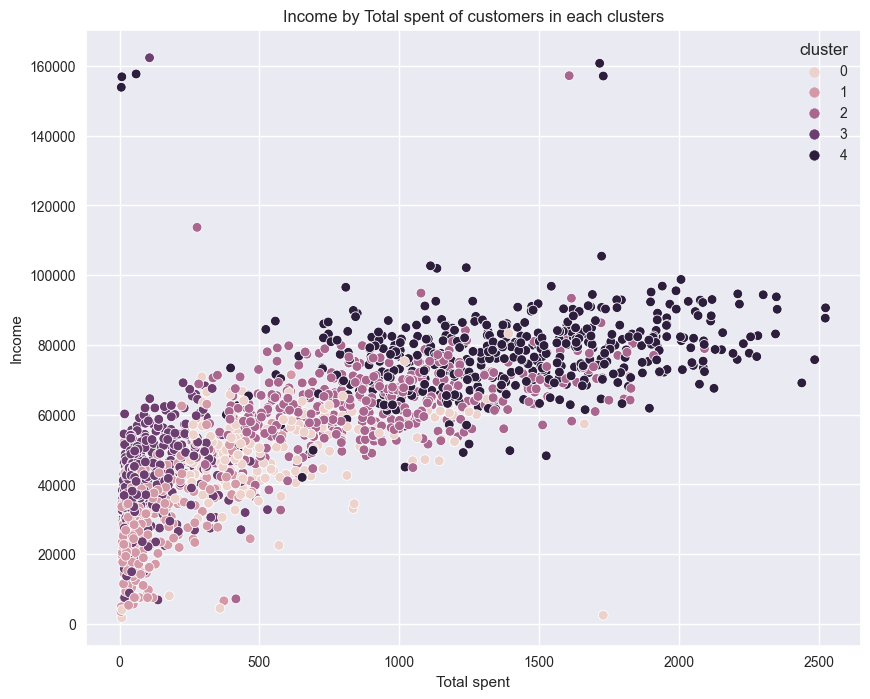

In [49]:
# Scatterplot of Income by Total spent of clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df["Totalspent"], y=df["Income"], hue=df["cluster"])
plt.title("Income by Total spent of customers in each clusters")
plt.xlabel("Total spent")
plt.ylabel("Income")
plt.show()

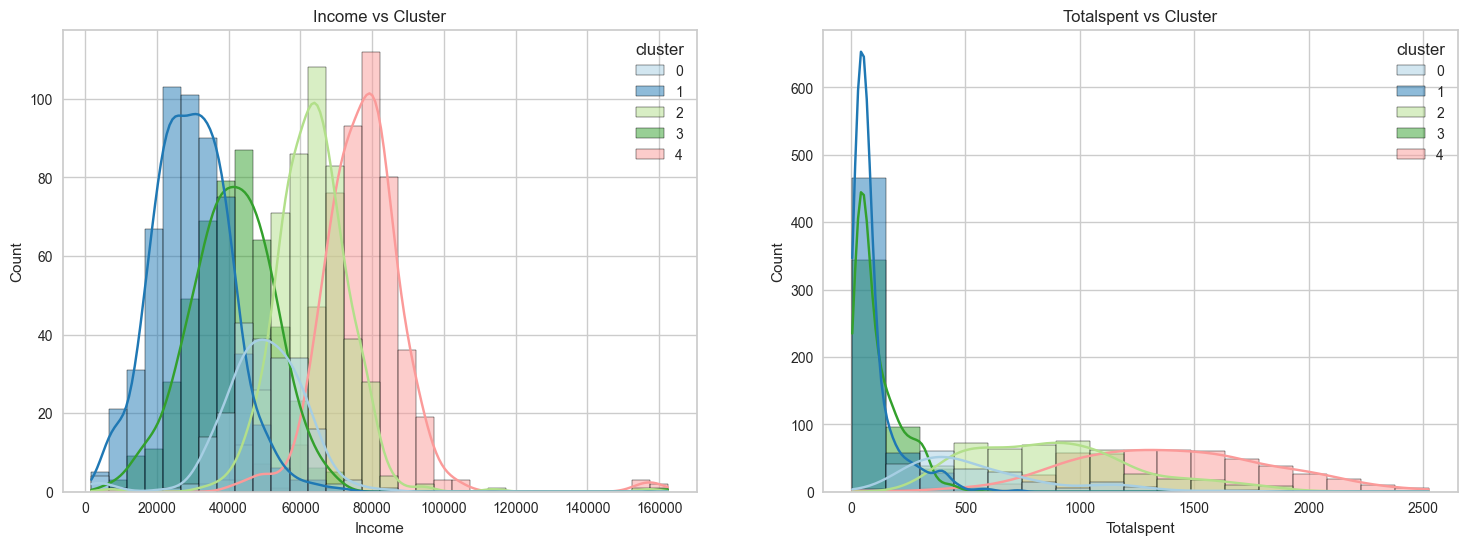

In [30]:
# Creating figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# First subplot: Income vs cluster
sns.histplot(data=df_main, x="Income", hue="cluster", kde=True, palette="Paired", ax=ax[0])
ax[0].set_title("Income vs Cluster")

# Second subplot: Totalspent vs cluster
sns.histplot(data=df_main, x="Totalspent", hue="cluster", kde=True, palette="Paired", ax=ax[1])
ax[1].set_title("Totalspent vs Cluster")

# Set darkgrid style
sns.set_style('darkgrid')

# Show the plot
plt.show()

The graphs shows that cluster 4 and 2 have spent the most amount on our products. Therefore, we can say that cluster 4 and 2 are our biggest customer segments.

# Total no of accepted promotions

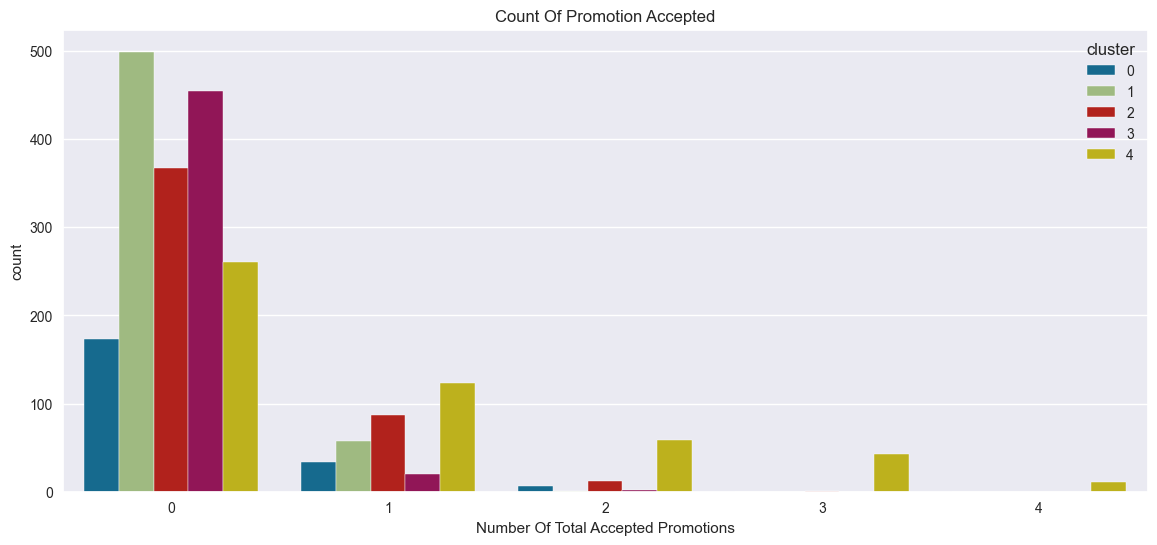

In [31]:
plt.figure()
pl = sns.countplot(x=df["Cmp_accepted"],hue=df["cluster"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In overall, the total number of customers who accepted the campaign is very low, and no customer has accepted all five promotions. Therefore, targeted marketing campaigns have significant potential to increase customer engagement.

# Age range of customers

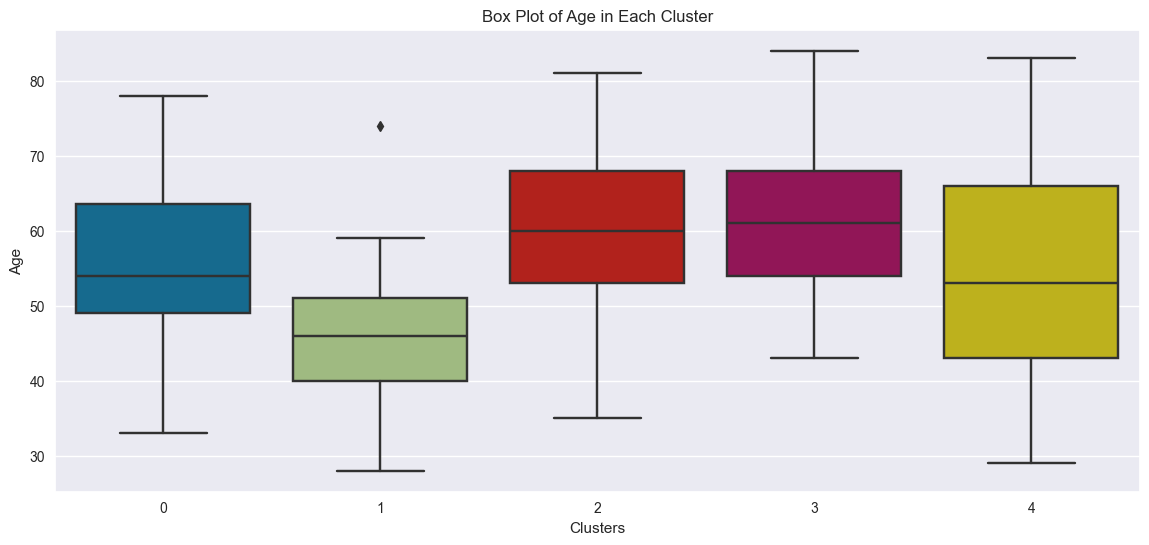

In [32]:
sns.boxplot(x="cluster", y="Age", data=df)
plt.title("Box Plot of Age in Each Cluster")
plt.xlabel("Clusters")
plt.ylabel("Age")
plt.show()

# Plotting the no of kids at home

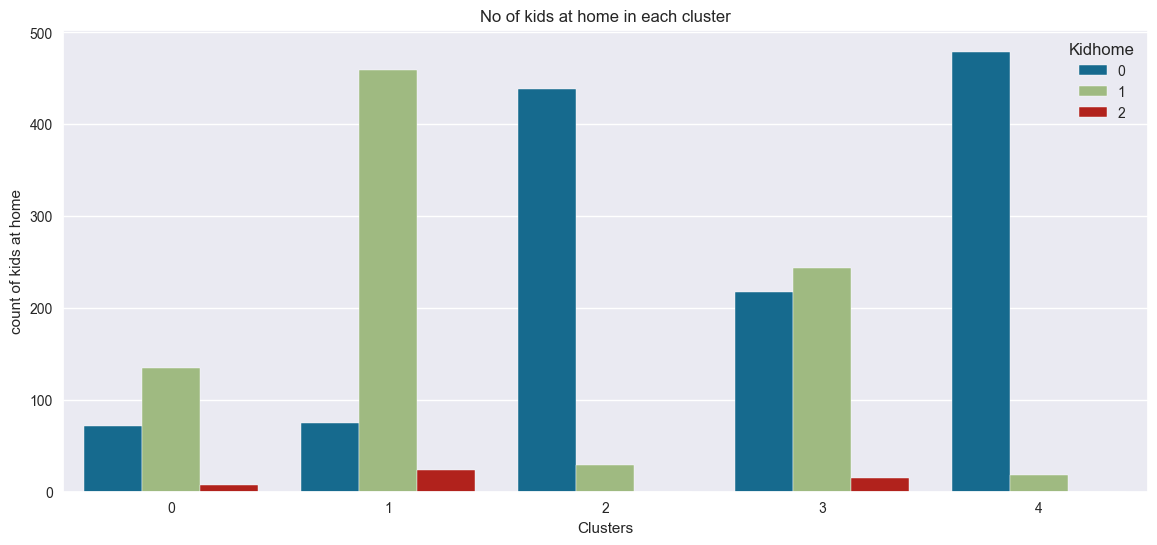

In [33]:
plt.figure()
pl = sns.countplot(x=df["cluster"], hue=df["Kidhome"])
pl.set_title("No of kids at home in each cluster")
pl.set_xlabel("Clusters")
pl.set_ylabel("count of kids at home")
plt.show()

# Education level of customers

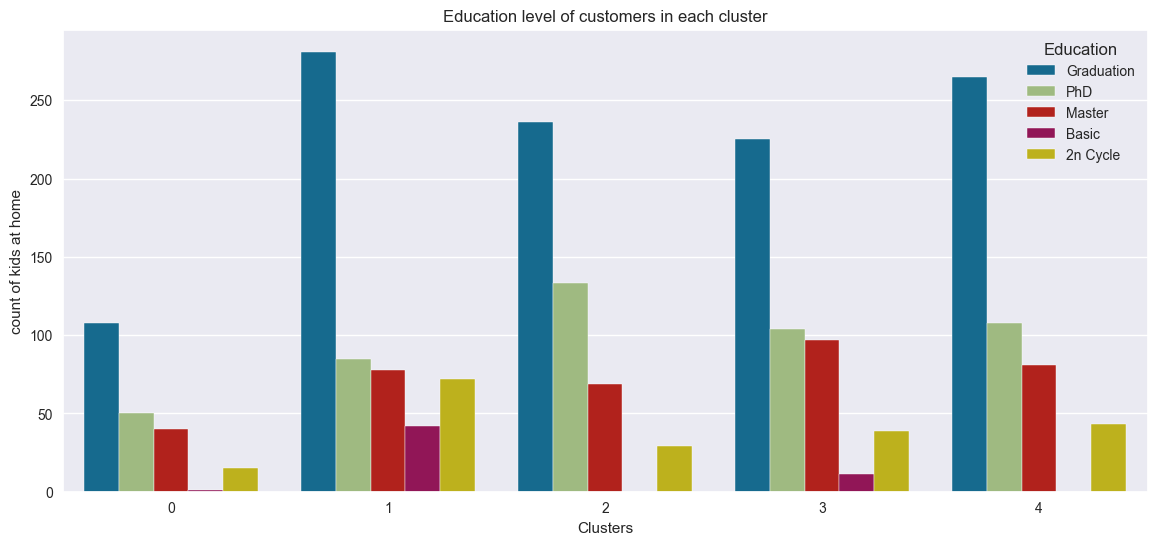

In [50]:
plt.figure()
pl = sns.countplot(x=df["cluster"], hue=df["Education"])
pl.set_title("Education level of customers in each cluster")
pl.set_xlabel("Clusters")
pl.set_ylabel("count of kids at home")
plt.show()

# Interpreting the results of clustering

Clustering resulted in grouping the customers into following segments


Cluster 0:
- Medium spending and medium income
- Very few have accepted promotional campaign
- Customers aged around 35 - 80
- Few of kids at home
- Most customers have bachelors and higher degree

Cluster 1: 
- Low spending and low income
- Very few have accepted promotional campaign
- Lower age range from about 28 - 59
- Likely to have a kid at home

Cluster 2:
- High spending and high income
- All customers have bachelors and higher degree
- Accepted the high number of promotions in comparision
- Customers aged around 35 - 80
- Very unlikely to have a kid at home

Cluster 3
- Low spending and low income
- Very few have accepted promotional campaign
- Customers from high age range of around 43 - 84
- Might have single or no kid at home

Cluster 4
- High spending and high income
- All customers have bachelors and higher degree
- Highest no of customers who have accepted promotional campaign
- Widest age range covering from 29 - 83
- Very unlikely to have a kid at home